In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Нормализация данных к шкале [0, 1]

def normalize_data(data):
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    normalized_data = (data - data_min) / (data_max - data_min)
    return normalized_data

In [7]:
# Инициализация весов

def initialize_weights(input_size, map_size):
    return np.random.rand(map_size[0], map_size[1], input_size)

# Изменение весов

def update_weights(weights, input_data, winner, learning_rate, sigma):
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            distance = np.linalg.norm(np.array([i, j]) - np.array(winner))
            influence = np.exp(-distance**2 / (2 * (sigma ** 2)))
            weights[i, j, :] += learning_rate * influence * (input_data - weights[i, j, :])

In [8]:
# Ищем победителя
# окрестность нейрона-победителя представляет собой несколько нейронов, которые окружают нейрон-победитель

def find_winner(weights, input_data):
    distances = np.linalg.norm(weights - input_data, axis=2)
    winner_idx = np.unravel_index(np.argmin(distances), distances.shape[:2])
    return winner_idx

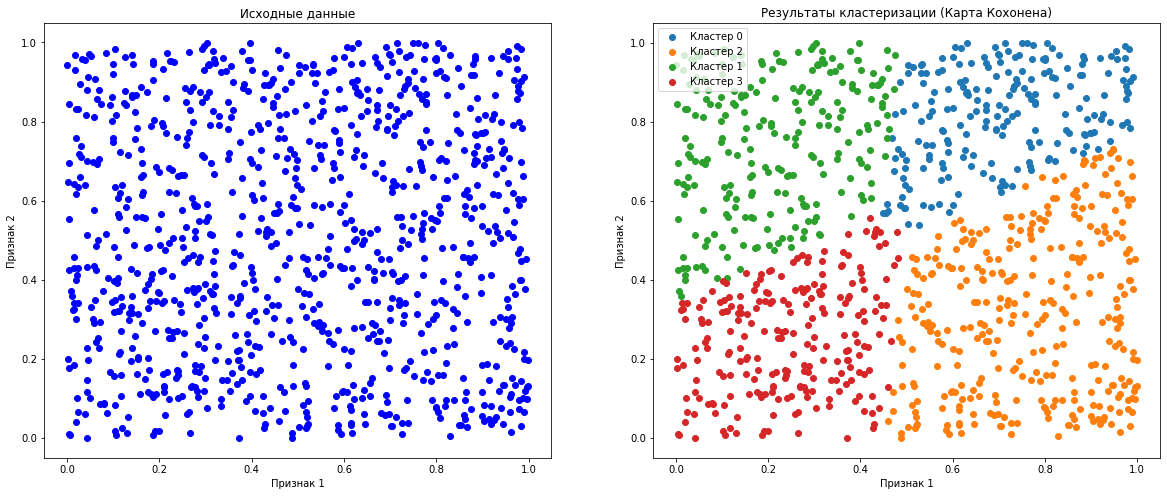

In [17]:
def main():
    # Ввод данных с клавиатуры
    num_clusters = int(input("Введите количество кластеров: "))

    # данные 1000 штук двумерный массив
    np.random.seed(0)
    data = np.random.rand(1000, 2)

    # Нормализация данных 
    normalized_data = normalize_data(data)

    # Параметры карты Кохонена
    map_size = (num_clusters, num_clusters)  # Размер карты
    # скорость обучения
    learning_rate = 0.1

    # Инициализация весов
    weights = initialize_weights(normalized_data.shape[1], map_size)

    # Обучение карты Кохонена
    n_epochs = 1000
    for epoch in range(n_epochs):
        for input_data in normalized_data:
            winner_idx = find_winner(weights, input_data)
            update_weights(weights, input_data, winner_idx, learning_rate, sigma=1.0)

    # Получение карты кластеров
    # создаётся словарь для заполнения кластеров

    clusters = {}
    for input_data in normalized_data:
        winner_idx = find_winner(weights, input_data)
        cluster_label = winner_idx[0] * map_size[1] + winner_idx[1]
        if cluster_label not in clusters:
            clusters[cluster_label] = []
        clusters[cluster_label].append(input_data)



    # Визуализация исходных данных и результатов кластеризации
    plt.figure(figsize=(20, 8))

    # Исходные данные
    plt.subplot(1, 2, 1)
    plt.scatter(data[:, 0], data[:, 1], c='blue', label='Исходные данные')
    plt.title('Исходные данные')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

    # Результаты кластеризации
    plt.subplot(1, 2, 2)
    for label, cluster in clusters.items():
        cluster_np = np.array(cluster)
        plt.scatter(cluster_np[:, 0], cluster_np[:, 1], label=f'Кластер {label}')


    plt.title('Результаты кластеризации (Карта Кохонена)')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    main()
